In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dali = pd.read_csv('dali.csv')
dali

,siteid,sitename,county,itemid,itemname,itemengname,itemunit,monitordate,concentration
0,30,大里,臺中市,33,細懸浮微粒,PM2.5,μg/m3,2022-09-19 22:00,35.00
1,30,大里,臺中市,7,二氧化氮,NO2,ppb,2022-09-19 22:00,9.70
2,30,大里,臺中市,4,懸浮微粒,PM10,μg/m3,2022-09-19 22:00,48.00
3,30,大里,臺中市,3,臭氧,O3,ppb,2022-09-19 22:00,48.60
4,30,大里,臺中市,2,一氧化碳,CO,ppm,2022-09-19 22:00,0.35
...,...,...,...,...,...,...,...,...,...
995,30,大里,臺中市,1,二氧化硫,SO2,ppb,2022-09-13 01:00,1.20
996,30,大里,臺中市,33,細懸浮微粒,PM2.5,μg/m3,2022-09-13 00:00,3.00
997,30,大里,臺中市,7,二氧化氮,NO2,ppb,2022-09-13 00:00,4.60
998,30,大里,臺中市,4,懸浮微粒,PM10,μg/m3,2022-09-13 00:00,24.00


In [70]:
import flask
from flask import request
from flask import jsonify
import sqlite3
import datetime
conn = sqlite3.connect('app/db/ahss.db')
cursor = conn.cursor()
query_user_id = 'SELECT user_id FROM users WHERE account=?'

get_real_data = 'SELECT * FROM sensors_data WHERE sensor_id=4 ORDER BY ud_time DESC limit 10 '
result_real_data = cursor.execute(get_real_data)
result_real_data
cursor.close()

In [2]:
dali.head()

,siteid,sitename,county,itemid,itemname,itemengname,itemunit,monitordate,concentration
0,30,大里,臺中市,33,細懸浮微粒,PM2.5,μg/m3,2022-09-19 22:00,35
1,30,大里,臺中市,7,二氧化氮,NO2,ppb,2022-09-19 22:00,9.7
2,30,大里,臺中市,4,懸浮微粒,PM10,μg/m3,2022-09-19 22:00,48
3,30,大里,臺中市,3,臭氧,O3,ppb,2022-09-19 22:00,48.6
4,30,大里,臺中市,2,一氧化碳,CO,ppm,2022-09-19 22:00,0.35


In [12]:
index = dali.index #0~1000
columns = dali.columns #欄位名稱
dali2 = dali.set_index('itemengname')
dali2

,siteid,sitename,county,itemid,itemname,itemunit,monitordate,concentration
itemengname,,,,,,,,
PM2.5,30,大里,臺中市,33,細懸浮微粒,μg/m3,2022-09-19 22:00,35.00
NO2,30,大里,臺中市,7,二氧化氮,ppb,2022-09-19 22:00,9.70
PM10,30,大里,臺中市,4,懸浮微粒,μg/m3,2022-09-19 22:00,48.00
O3,30,大里,臺中市,3,臭氧,ppb,2022-09-19 22:00,48.60
CO,30,大里,臺中市,2,一氧化碳,ppm,2022-09-19 22:00,0.35
...,...,...,...,...,...,...,...,...
SO2,30,大里,臺中市,1,二氧化硫,ppb,2022-09-13 01:00,1.20
PM2.5,30,大里,臺中市,33,細懸浮微粒,μg/m3,2022-09-13 00:00,3.00
NO2,30,大里,臺中市,7,二氧化氮,ppb,2022-09-13 00:00,4.60


In [28]:
item = dali.itemengname.isin(['PM2.5','NO2','PM10','O3','CO','SO2'])

dali[item].groupby('itemengname').concentration.agg(['mean'])

,mean
itemengname,
CO,0.345120
NO2,10.476647
O3,43.165868
PM10,35.616766
PM2.5,17.616766
SO2,1.397590


In [65]:
item1 = dali.itemengname.isin(['PM2.5'])
item2 = dali.itemengname.isin(['NO2'])
item3 = dali.itemengname.isin(['PM10'])
item4 = dali.itemengname.isin(['O3'])
item5 = dali.itemengname.isin(['CO'])
item6 = dali.itemengname.isin(['SO2'])
data = ({'PM2.5':dali[item1].concentration.values.tolist(),
         'NO2':dali[item2].concentration.values.tolist(),
         'PM10':dali[item3].concentration.values.tolist(),
         'O3':dali[item4].concentration.values.tolist(),
         'CO':dali[item5].concentration.values.tolist(),
         'SO2':dali[item6].concentration.values.tolist(),
         'update_time':dali[item1].monitordate.values.tolist()})
data1 = pd.DataFrame.from_dict(data,orient='index')
data1 = data1.transpose().sort_values(by=['update_time'])
data1.to_json("test1.json", orient = 'index')

In [20]:
item = dali.itemengname.isin(['PM2.5','NO2','PM10','O3','CO','SO2'])

dali[item].groupby('itemengname').concentration.agg(['mean'])

,mean
itemengname,
CO,0.345120
NO2,10.476647
O3,43.165868
PM10,35.616766
PM2.5,17.616766
SO2,1.397590


In [20]:
item = dali.itemengname.isin(['PM2.5','NO2','PM10','O3','CO','SO2'])

dali[item].groupby('itemengname').concentration.agg(['mean'])

,mean
itemengname,
CO,0.345120
NO2,10.476647
O3,43.165868
PM10,35.616766
PM2.5,17.616766
SO2,1.397590


In [54]:
data

{'PM2.5': [35.0,
  32.0,
  27.0,
  24.0,
  23.0,
  27.0,
  23.0,
  23.0,
  23.0,
  22.0,
  25.0,
  28.0,
  22.0,
  21.0,
  20.0,
  20.0,
  20.0,
  23.0,
  23.0,
  19.0,
  23.0,
  17.0,
  24.0,
  22.0,
  25.0,
  27.0,
  28.0,
  26.0,
  19.0,
  17.0,
  14.0,
  15.0,
  31.0,
  20.0,
  21.0,
  19.0,
  15.0,
  13.0,
  11.0,
  15.0,
  6.0,
  16.0,
  16.0,
  11.0,
  17.0,
  19.0,
  17.0,
  22.0,
  18.0,
  22.0,
  19.0,
  17.0,
  10.0,
  9.0,
  13.0,
  12.0,
  11.0,
  9.0,
  11.0,
  11.0,
  11.0,
  24.0,
  28.0,
  14.0,
  17.0,
  24.0,
  15.0,
  18.0,
  18.0,
  20.0,
  20.0,
  23.0,
  27.0,
  25.0,
  23.0,
  17.0,
  14.0,
  12.0,
  15.0,
  14.0,
  12.0,
  15.0,
  27.0,
  22.0,
  22.0,
  26.0,
  18.0,
  14.0,
  14.0,
  12.0,
  14.0,
  15.0,
  16.0,
  19.0,
  23.0,
  23.0,
  25.0,
  25.0,
  23.0,
  19.0,
  13.0,
  10.0,
  12.0,
  16.0,
  16.0,
  21.0,
  19.0,
  21.0,
  21.0,
  17.0,
  25.0,
  20.0,
  18.0,
  15.0,
  21.0,
  20.0,
  32.0,
  23.0,
  27.0,
  27.0,
  28.0,
  26.0,
  27.0,
  28.0,
  

In [55]:
fname= ['a','b']
lname= ['d','c']
people = {'fname':fname,'lname':lname}
beatles = pd.DataFrame(people)
beatles

,fname,lname
0,a,d
1,b,c


In [58]:
dali[item1].concentration.values.tolist()

[35.0,
 32.0,
 27.0,
 24.0,
 23.0,
 27.0,
 23.0,
 23.0,
 23.0,
 22.0,
 25.0,
 28.0,
 22.0,
 21.0,
 20.0,
 20.0,
 20.0,
 23.0,
 23.0,
 19.0,
 23.0,
 17.0,
 24.0,
 22.0,
 25.0,
 27.0,
 28.0,
 26.0,
 19.0,
 17.0,
 14.0,
 15.0,
 31.0,
 20.0,
 21.0,
 19.0,
 15.0,
 13.0,
 11.0,
 15.0,
 6.0,
 16.0,
 16.0,
 11.0,
 17.0,
 19.0,
 17.0,
 22.0,
 18.0,
 22.0,
 19.0,
 17.0,
 10.0,
 9.0,
 13.0,
 12.0,
 11.0,
 9.0,
 11.0,
 11.0,
 11.0,
 24.0,
 28.0,
 14.0,
 17.0,
 24.0,
 15.0,
 18.0,
 18.0,
 20.0,
 20.0,
 23.0,
 27.0,
 25.0,
 23.0,
 17.0,
 14.0,
 12.0,
 15.0,
 14.0,
 12.0,
 15.0,
 27.0,
 22.0,
 22.0,
 26.0,
 18.0,
 14.0,
 14.0,
 12.0,
 14.0,
 15.0,
 16.0,
 19.0,
 23.0,
 23.0,
 25.0,
 25.0,
 23.0,
 19.0,
 13.0,
 10.0,
 12.0,
 16.0,
 16.0,
 21.0,
 19.0,
 21.0,
 21.0,
 17.0,
 25.0,
 20.0,
 18.0,
 15.0,
 21.0,
 20.0,
 32.0,
 23.0,
 27.0,
 27.0,
 28.0,
 26.0,
 27.0,
 28.0,
 32.0,
 22.0,
 17.0,
 17.0,
 16.0,
 23.0,
 15.0,
 12.0,
 10.0,
 9.0,
 11.0,
 12.0,
 11.0,
 11.0,
 11.0,
 12.0,
 12.0,
 10.0,
 16.0,
 17

In [35]:
dali2 = pd.read_csv('dali.csv',index_col='itemengname')
dali[item][monitor].groupby('itemengname').concentration.head()


0     35.00
1      9.70
2     48.00
3     48.60
4      0.35
5      1.90
6     32.00
7     16.10
8     48.00
9     38.60
10     0.46
11     1.50
12    27.00
13    17.80
14    51.00
15    40.60
16     0.52
17     1.30
18    24.00
19    15.50
20    39.00
21    51.80
22     0.51
23     1.30
24    23.00
25    17.00
26    43.00
27    57.60
28     0.50
29     1.60
Name: concentration, dtype: float64

In [25]:
monitor = dali.monitordate.isin(dali.monitordate)
dali[monitor].groupby('monitordate').concentration.agg(item)

C:\Users\admin\AppData\Local\Temp\ipykernel_2752\3903729378.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dali[monitor].groupby('monitordate').concentration.agg(item)


IndexError: index 0 is out of bounds for axis 0 with size 0

<AxesSubplot: >

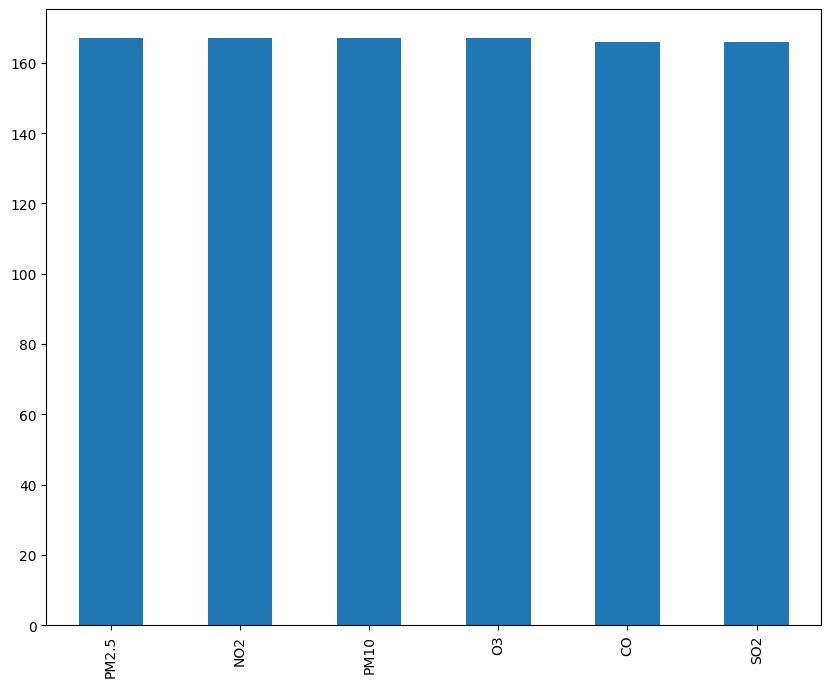

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
top_n = dali.itemengname.value_counts().index[:6]
(dali.assign(item=dali.itemengname.where(dali.itemengname.isin(top_n),'other'))
     .item.value_counts().plot.bar(ax=ax))

In [34]:
dali.concentration.str.extract(r'([^0-9.])').dropna().apply(lambda row: ''.join(row), axis=1).value_counts()

x    4
dtype: int64

In [24]:
set(dali.concentration.apply(type))

{str}

In [25]:
dali.concentration.value_counts()

1.2      23
1.3      20
23       19
1.6      19
0.28     18
         ..
11.8      1
100.2     1
84.9      1
12.5      1
4.6       1
Name: concentration, Length: 341, dtype: int64

In [55]:
dali.concentration.str.extract(r'([^0-9.])').dropna()

,0
354,x
356,x
360,x
362,x


In [67]:
col2.dtypes

siteid            int64
sitename         object
county           object
itemid            int64
itemname         object
itemengname      object
itemunit         object
monitordate      object
concentration    object
dtype: object

In [12]:
import flask
from flask import request
from flask import jsonify
import sqlite3
conn = sqlite3.connect('app/db/ahss.db')
cursor = conn.cursor()
query_users = 'SELECT * FROM users'
result = cursor.execute(query_users).fetchone()
a = [result[0],result[1]]

a[1]

'Tezcat'

In [13]:
conn.close()